import neccessay packages

In [1]:
import pypylon.pylon as py
from PIL import Image
import cv2
import numpy as np
from matplotlib import pyplot as plt
import random
import math
import statistics

In [2]:
camera = py.InstantCamera(py.TlFactory.GetInstance().CreateFirstDevice())
camera.Open()
camera.ExposureAuto.SetValue("Continuous")
camera.GainAuto.SetValue("Continuous")
camera.StartGrabbing(1)
grab = camera.RetrieveResult(2000, py.TimeoutHandling_ThrowException)


once the image is grabbed, do binary thresholding and get find the contours

In [3]:
if grab.GrabSucceeded():
    img = grab.Array
    _,thresh1 = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    x_array = []
    y_array = []
else:
    print("grab not done")


append the x points of contours in x_array and y points of contours in y_array

In [4]:
for contour in contours:
    area = cv2.contourArea(contour)
    if 100000 < area < 1000000:
                      
        (x,y),mn_radius = cv2.minEnclosingCircle(contour)
        for i in contour:
            x_array.append(i[0][0])
            y_array.append(i[0][1])

find the length of the contour and append all other contour points as (x,y) in rad_points array. calculate the radius btw the rad_points(contour points) and the centre and append the values in rad array.

In [5]:
num_contours = len(x_array)
rad_points = [(x_array[i],y_array[i]) for i in range(num_contours)]
centre = [x,y]
rad = [math.dist(point,centre) for point in rad_points]

now find the average radius by taking mean of all the values in rad array
also find error using err = (aprox.value - absol.value) / (absol.value) 

In [31]:
#for getting the avg rad
avg_rad=statistics.mean(rad)
err=(avg_rad-mn_radius)/(mn_radius)

    


Text(0, 0.5, '------radius in mm------->')

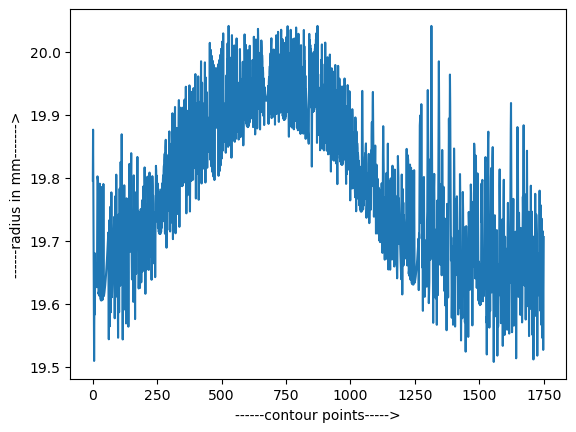

In [35]:
rad_np=np.array(rad)
rad_npmm=rad_np*0.09
plt.plot(rad_npmm)
plt.xlabel('------contour points----->')
plt.ylabel('------radius in mm------->')

In [ ]:
#now convert pixel value to absolute scale value, 
#from previous calibration it is found that 1px = 0.09mm

In [27]:
print("The number of contour points are: ",num_contours)
print("The radius found using minEnclosingCircle: ",mn_radius*0.09)
print("The mean radius found through plotting the contours is : ",avg_rad*0.09)
print("The error is around ",err*100)



The number of contour points are:  1751
The radius found using minEnclosingCircle:  20.040965881347656
The mean radius found through plotting the contours is :  19.78991582557312
The error is around  -1.252684412821576


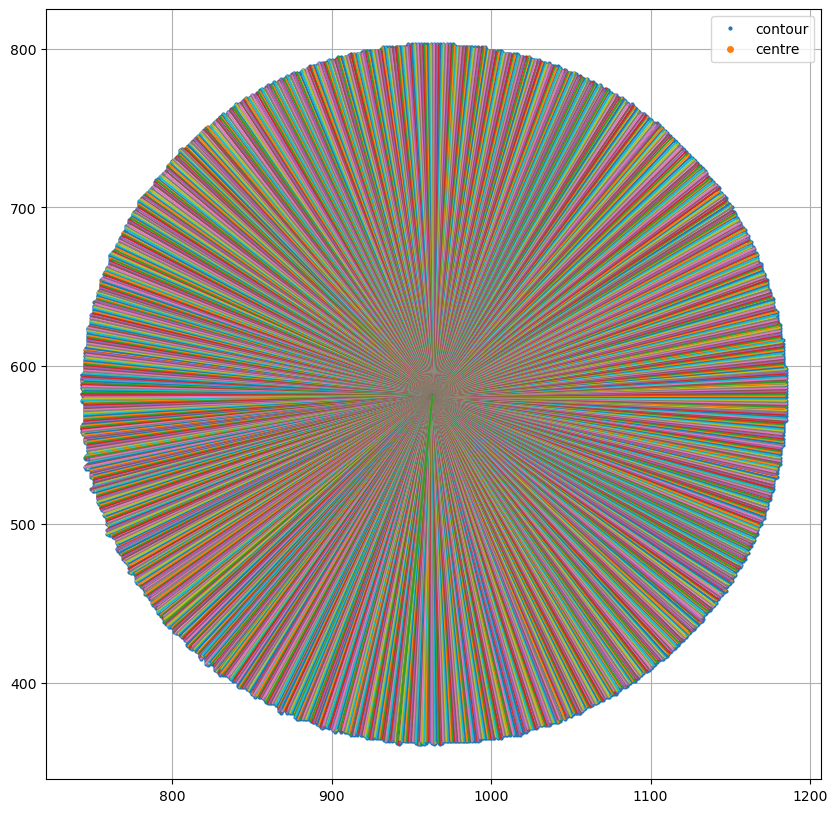

In [ ]:
#plot the contour and plot all the radius
plt.figure(figsize=(10,10))
plt.plot(x_array,y_array,'o',markersize=2,label='contour')
plt.plot(x,y,'o',markersize=4,label='centre')
for i in range(num_contours):
    plt.plot([x,rad_points[i][0]],[y,rad_points[i][1]])
plt.grid()
plt.legend()
plt.show()


In [9]:
#all other contour points are:
print(rad_points)

[(941, 362), (942, 361), (943, 362), (943, 363), (943, 364), (943, 365), (943, 364), (944, 363), (945, 364), (946, 363), (947, 363), (948, 363), (949, 363), (950, 363), (951, 363), (952, 363), (953, 363), (953, 362), (954, 361), (955, 361), (956, 361), (957, 362), (956, 363), (955, 363), (956, 363), (957, 363), (957, 362), (958, 361), (959, 362), (959, 363), (960, 363), (961, 363), (962, 363), (963, 363), (963, 362), (964, 361), (965, 362), (965, 363), (966, 363), (967, 363), (967, 362), (968, 361), (969, 362), (969, 363), (970, 363), (971, 363), (972, 363), (973, 363), (974, 363), (975, 363), (976, 363), (977, 363), (978, 363), (979, 363), (980, 363), (981, 363), (982, 363), (983, 363), (984, 363), (985, 363), (986, 363), (987, 364), (987, 365), (987, 364), (988, 363), (989, 364), (989, 365), (989, 364), (990, 363), (991, 364), (991, 365), (991, 364), (992, 363), (993, 364), (993, 365), (994, 365), (995, 365), (996, 365), (997, 365), (998, 365), (999, 365), (1000, 365), (1001, 365), (